## Предобработка

Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import train_test_split

import seaborn as sns
sns.set()

df = pd.read_csv('brain_stroke.csv')

In [2]:
df.describe(include=['object', 'number'])

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4981,4981.000000,4981.000000,4981.000000,4981,4981,4981,4981.000000,4981.000000,4981,4981.000000
unique,2,NaN,NaN,NaN,2,4,2,NaN,NaN,4,NaN
top,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,2907,NaN,NaN,NaN,3280,2860,2532,NaN,NaN,1838,NaN
mean,NaN,43.419859,0.096165,0.055210,NaN,NaN,NaN,105.943562,28.498173,NaN,0.049789
std,NaN,22.662755,0.294848,0.228412,NaN,NaN,NaN,45.075373,6.790464,NaN,0.217531
min,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,14.000000,NaN,0.000000
25%,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.230000,23.700000,NaN,0.000000
50%,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.850000,28.100000,NaN,0.000000
75%,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,113.860000,32.600000,NaN,0.000000


Проведем кодирование категориальных столбцов.

Для gender, residence_type используем OneHotEncoder.

In [3]:
onehotencoder = OneHotEncoder()

res = onehotencoder.fit_transform(df[['gender']])
df[onehotencoder.categories_[0]] = res.toarray()
df.drop('gender', axis=1, inplace=True)

res = onehotencoder.fit_transform(df[['Residence_type']])
df[onehotencoder.categories_[0]] = res.toarray()
df.drop('Residence_type', axis=1, inplace=True)

df.head()

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke,Female,Male,Rural,Urban
0,67.0,0,1,Yes,Private,228.69,36.6,formerly smoked,1,0.0,1.0,0.0,1.0
1,80.0,0,1,Yes,Private,105.92,32.5,never smoked,1,0.0,1.0,1.0,0.0
2,49.0,0,0,Yes,Private,171.23,34.4,smokes,1,1.0,0.0,0.0,1.0
3,79.0,1,0,Yes,Self-employed,174.12,24.0,never smoked,1,1.0,0.0,1.0,0.0
4,81.0,0,0,Yes,Private,186.21,29.0,formerly smoked,1,0.0,1.0,0.0,1.0


Для work_type и smoking_status и ever_married  используем OrdinalEncoder.

In [4]:
ordEnc = OrdinalEncoder()
df[["smoking_status", 'work_type', 'ever_married']] = ordEnc.fit_transform(df[["smoking_status", 'work_type', 'ever_married']])

df.head()

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke,Female,Male,Rural,Urban
0,67.0,0,1,1.0,1.0,228.69,36.6,1.0,1,0.0,1.0,0.0,1.0
1,80.0,0,1,1.0,1.0,105.92,32.5,2.0,1,0.0,1.0,1.0,0.0
2,49.0,0,0,1.0,1.0,171.23,34.4,3.0,1,1.0,0.0,0.0,1.0
3,79.0,1,0,1.0,2.0,174.12,24.0,2.0,1,1.0,0.0,1.0,0.0
4,81.0,0,0,1.0,1.0,186.21,29.0,1.0,1,0.0,1.0,0.0,1.0


Разделим целевой и нецелевые признаки, разделим тренировочную и тестовую выборки.

In [5]:
y = df['stroke']
X = df.drop(['stroke'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

Целевой признак кодируем LabelEncoder

In [6]:
labEnc = LabelEncoder()
y_train = labEnc.fit_transform(y_train)
y_test = labEnc.transform(y_test)

## Балансировка

Посмотрим на количество значений классов по целевому признаку.

In [7]:
pd.DataFrame(y_train).value_counts()

0
0    3780
1     204
Name: count, dtype: int64

Проведем балансировку данных. Выбран метод SMOTETomek - комбинация оверсэплинга и андерсэмплинга.

In [8]:
from imblearn.combine import SMOTETomek

sampler = SMOTETomek()

X_train, y_train = sampler.fit_resample(X_train, y_train)

# Обучение

## 1. Метод KNN

Нормализация нецелевых признаков

In [9]:
scaler_mm = StandardScaler()

X_train_1 = scaler_mm.fit_transform(X_train)
X_train_1 = pd.DataFrame(X_train_1, columns = scaler_mm.feature_names_in_)

X_test_1 = scaler_mm.transform(X_test)
X_test_1 = pd.DataFrame(X_test_1, columns =  scaler_mm.feature_names_in_)

X_train_1.describe()
X_test_1.describe()

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,Female,Male,Rural,Urban
count,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000
mean,-0.528771,0.025082,0.100012,-0.271531,0.109878,-0.246250,-0.154062,0.034183,0.003619,-0.003619,-0.002975,0.002975
std,1.029199,1.036526,1.195124,1.174107,1.180184,0.803869,1.174033,1.107859,1.081106,1.081106,1.087725,1.087725
min,-2.491854,-0.307210,-0.218035,-1.877664,-1.682903,-1.163093,-2.537338,-1.470180,-1.260304,-0.927423,-1.046328,-1.129871
25%,-1.368046,-0.307210,-0.218035,-1.877664,-0.303734,-0.765177,-0.991133,-1.470180,-1.260304,-0.927423,-1.046328,-1.129871
50%,-0.417967,-0.307210,-0.218035,0.585897,-0.303734,-0.473612,-0.209535,0.621661,0.927423,-0.927423,-1.046328,1.046328
75%,0.260660,-0.307210,-0.218035,0.585897,1.075435,-0.103912,0.521089,0.621661,0.927423,1.260304,1.129871,1.046328
max,1.210739,3.255100,4.586414,0.585897,2.454603,2.661789,3.341639,1.667581,0.927423,1.260304,1.129871,1.046328


Подбор гиперпараметров

In [10]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics

print("Данные нормированы metric=manhattan")
print('k\tAccuracy\t\tPrecision')
score1 = []
for i in range(1,10):
    clf = KNeighborsClassifier(n_neighbors=i, metric='manhattan')
    clf.fit(X_train_1, y_train)
    y_pred = clf.predict(X_test_1)
    score1.append(clf.score(X_test_1, y_test))
    score1.append(metrics.f1_score(y_test, y_pred))
    print(i, score1[-2], score1[-1], sep='\t')

print("Данные нормированы metric=euclidean")
print('k\tAccuracy\t\tPrecision')
score2 = []
for i in range(1,10):
    clf = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    clf.fit(X_train_1, y_train)
    y_pred = clf.predict(X_test_1)
    score2.append(clf.score(X_test_1, y_test))
    score2.append(metrics.f1_score(y_test, y_pred))
    print(i, score2[-2], score2[-1], sep='\t')

Данные нормированы metric=manhattan
k	accuracy_test		f1_test
1	0.8986960882647944	0.13675213675213677
2	0.9187562688064193	0.0898876404494382
3	0.892678034102307	0.11570247933884298
4	0.9207622868605817	0.11235955056179775
5	0.8866599799398195	0.13740458015267176
6	0.9017051153460381	0.125
7	0.8846539618856569	0.16058394160583941
8	0.8956870611835507	0.08771929824561403
9	0.8746238716148446	0.10071942446043165
Данные нормированы metric=euclidean
k	accuracy_test		f1_test
1	0.8916750250752257	0.15625
2	0.9007021063189569	0.10810810810810811
3	0.8635907723169508	0.1282051282051282
4	0.8746238716148446	0.1258741258741259
5	0.8405215646940822	0.15873015873015872
6	0.8555667001003009	0.16279069767441862
7	0.8194583751253761	0.1509433962264151
8	0.8465396188565697	0.16393442622950818
9	0.8284854563691073	0.18181818181818182


Наилучшие гиперпараметры - метрика Манхэттен и k = 4.

In [11]:
clf = KNeighborsClassifier(n_neighbors=4, metric='manhattan')
clf.fit(X_train_1, y_train)

from sklearn.metrics import accuracy_score, classification_report

predictions = clf.predict(X_test_1)
print('Accuracy:', accuracy_score(y_test, predictions) * 100)
print('Classification Report:\n', classification_report(y_test, predictions))

Accuracy: 92.07622868605817
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       953
           1       0.11      0.11      0.11        44

    accuracy                           0.92       997
   macro avg       0.54      0.54      0.54       997
weighted avg       0.92      0.92      0.92       997



<Axes: >

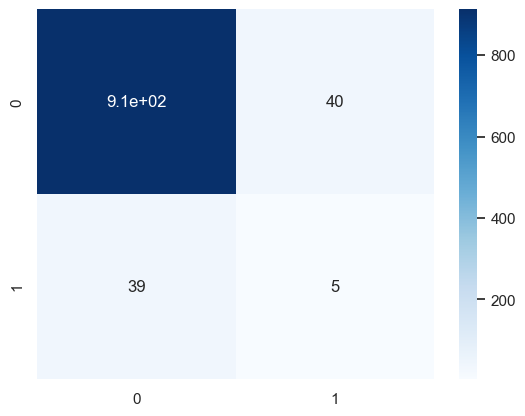

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions, labels=clf.classes_)

plt.figure()
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True)

## 2. Метод опорных векторов (SVM)

Нормализация

In [13]:
scaler_ma = MinMaxScaler(feature_range=(-1, 1))

X_train_2 = scaler_ma.fit_transform(X_train)
X_train_2 = pd.DataFrame(X_train_2, columns = scaler_mm.feature_names_in_)

X_test_2 = scaler_ma.transform(X_test)
X_test_2 = pd.DataFrame(X_test_2, columns =  scaler_mm.feature_names_in_)

X_train_2.describe()
X_test_2.describe()

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,Female,Male,Rural,Urban
count,997.000000,997.00000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000
mean,0.061300,-0.81344,-0.867603,0.303912,-0.133400,-0.532695,-0.178998,-0.041123,0.155466,-0.155466,-0.041123,0.041123
std,0.555391,0.58194,0.497507,0.953178,0.570481,0.410533,0.395967,0.706146,0.988337,0.988337,0.999656,0.999656
min,-0.998047,-1.00000,-1.000000,-1.000000,-1.000000,-1.000924,-0.982808,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.391602,-1.00000,-1.000000,-1.000000,-0.333333,-0.797709,-0.461318,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.121094,-1.00000,-1.000000,1.000000,-0.333333,-0.648808,-0.197708,0.333333,1.000000,-1.000000,-1.000000,1.000000
75%,0.487305,-1.00000,-1.000000,1.000000,0.333333,-0.460004,0.048711,0.333333,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.00000,1.000000,1.000000,1.000000,0.952429,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
from sklearn.svm import LinearSVC, SVC, NuSVC

svc=SVC()
svc.fit(X_train_2, y_train)
print(svc.score(X_test_2, y_test))

0.8706118355065195


In [15]:
predictions = svc.predict(X_test_2)
print('Accuracy:', accuracy_score(y_test, predictions) * 100)
print('Classification Report:\n', classification_report(y_test, predictions))

Accuracy: 87.06118355065196
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.93       953
           1       0.13      0.34      0.19        44

    accuracy                           0.87       997
   macro avg       0.55      0.62      0.56       997
weighted avg       0.93      0.87      0.90       997



<Axes: >

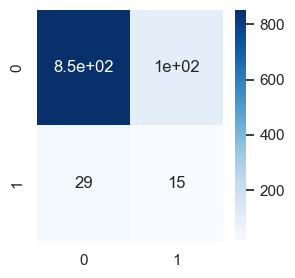

In [16]:
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)

plt.figure(figsize=(3, 3))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True)

## 3. Случайный лес

Нормализация нецелевых признаков

In [17]:
scaler_ss = StandardScaler()

X_train_3 = scaler_ss.fit_transform(X_train)
X_train_3 = pd.DataFrame(X_train_3, columns = scaler_ss.feature_names_in_)

X_test_3 = scaler_ss.transform(X_test)
X_test_3 = pd.DataFrame(X_test_3, columns =  scaler_ss.feature_names_in_)

Создаем и обучаем случайный лес

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier(n_estimators=100)
rf.fit(X_train_3, y_train)
print(rf.score(X_test_3, y_test))

0.9448345035105316


In [19]:
predictions = rf.predict(X_test_3)
print('Accuracy:', accuracy_score(y_test, predictions) * 100)
print('Classification Report:\n', classification_report(y_test, predictions))

Accuracy: 94.48345035105315
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       953
           1       0.13      0.05      0.07        44

    accuracy                           0.94       997
   macro avg       0.55      0.52      0.52       997
weighted avg       0.92      0.94      0.93       997



<Axes: >

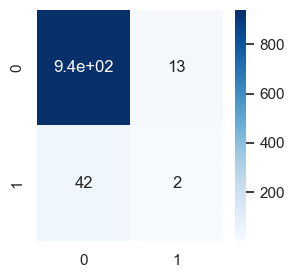

In [20]:
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)

plt.figure(figsize=(3, 3))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True)